In [12]:
import psycopg2
import pandas as pd
import plotly.express as px


conn = psycopg2.connect(
    database="dbt-demo",
    user="postgres",
    password="postgres",
    host="localhost",
    port="5432",
)
cur = conn.cursor()

query = "SELECT date_start, rideable_type, count FROM staging.trip_daily_counts_by_model"
cur.execute(query)

data = cur.fetchall()
columns = pd.Series(["date_start","rideable_type", "count"])
df = pd.DataFrame(data, columns=columns)



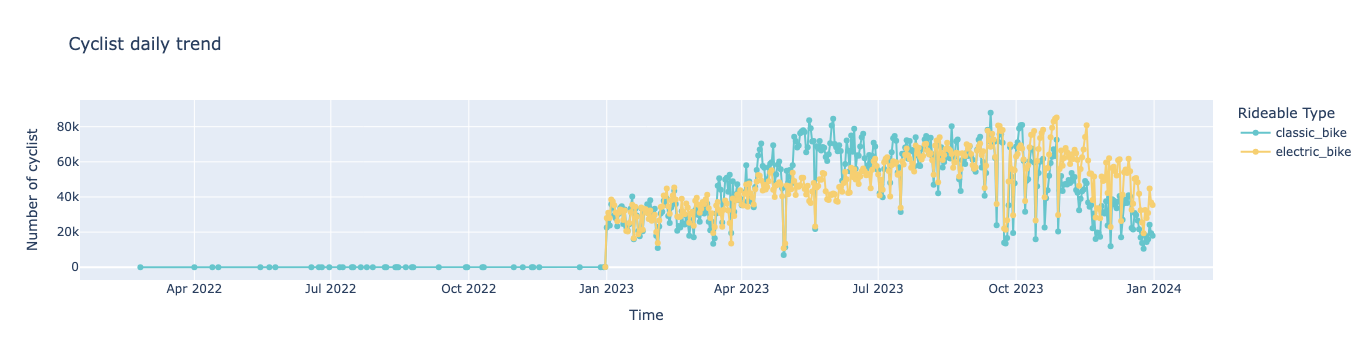

In [51]:
fig = px.line(df, x='date_start', 
              y="count",markers=True, 
              title="Cyclist daily trend",color="rideable_type", 
              labels={"date_start": "Time", "count": "Number of cyclist", "rideable_type": "Rideable Type"},
              color_discrete_sequence=px.colors.qualitative.Pastel
             )
fig.show()
fig.write_html("daily_cyclist_trend.html")

In [21]:
query = "SELECT day_of_week, station_name, number_of_starts FROM staging.popular_start_stations"
cur.execute(query)

data = cur.fetchall()
columns = pd.Series(["day_of_week","station_name", "number_of_starts"])
popular_stations = pd.DataFrame(data, columns=columns)

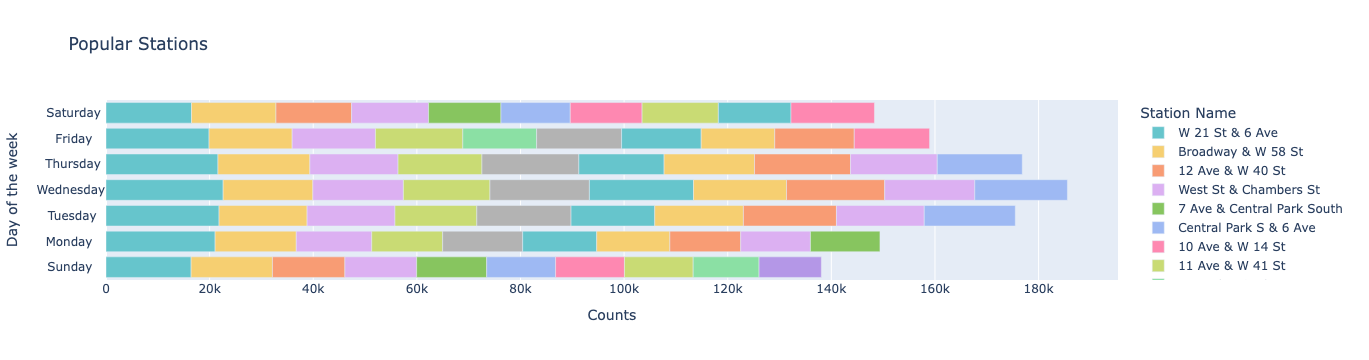

In [49]:
fig = px.bar(popular_stations, 
             x='number_of_starts',
             y='day_of_week',
             color="station_name",
             title="Popular Stations",
            labels={"number_of_starts": "Counts", "day_of_week": "Day of the week", "station_name": "Station Name"},
             orientation='h',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()
fig.write_html("popular_stations.html")

In [35]:
query = "SELECT start_time, average_duration, average_duration_epochs FROM staging.trip_duration_trend"
cur.execute(query)

data = cur.fetchall()
columns = pd.Series(["start_time","average_duration", "average_duration_epochs"])
average_duration = pd.DataFrame(data, columns=columns)

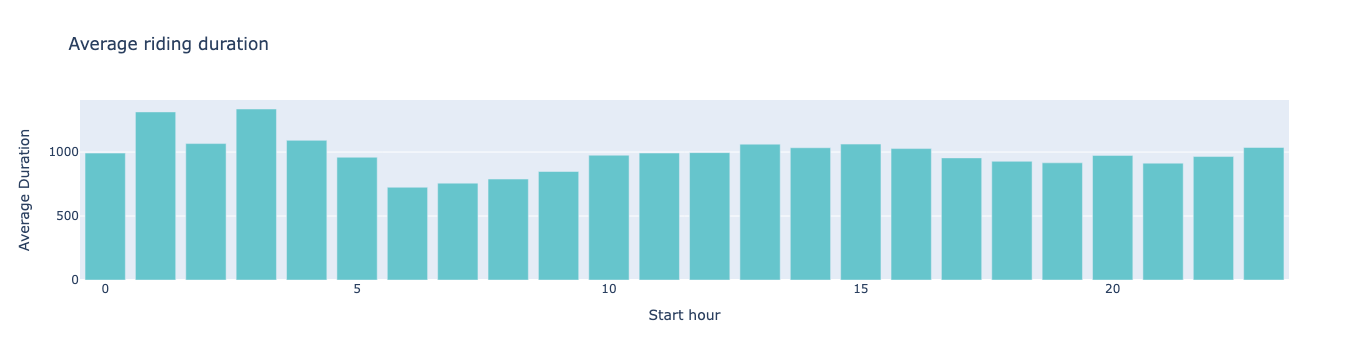

In [48]:
fig = px.bar(average_duration, 
             x='start_time',
             y='average_duration_epochs',
             title="Average riding duration",
             labels={"start_time": "Start hour", "average_duration_epochs": "Average Duration"},
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()
fig.write_html("average_riding_duration.html")

In [42]:
query = "SELECT trip_week, trip_year, sum FROM staging.trip_weekly_counts"
cur.execute(query)

data = cur.fetchall()
columns = pd.Series(["trip_week","trip_year", "sum"])
weekly_trend = pd.DataFrame(data, columns=columns)

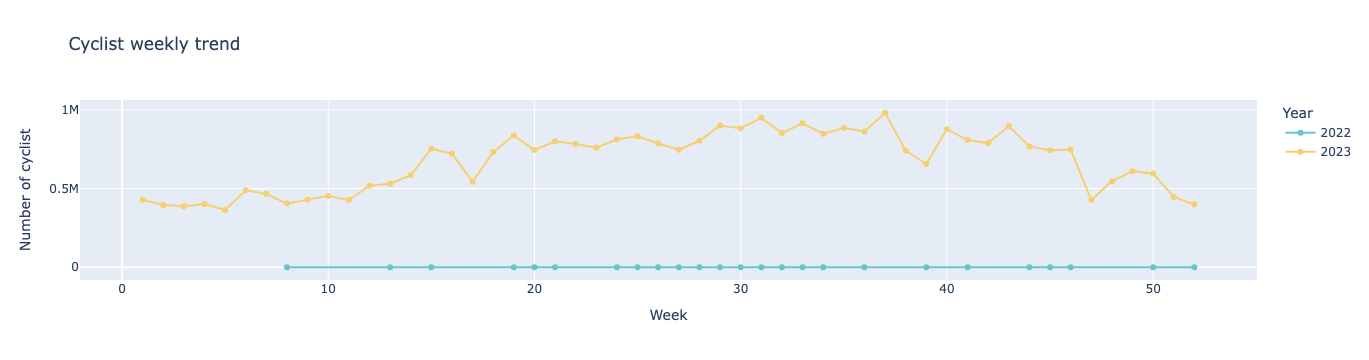

In [46]:
fig = px.line(weekly_trend, x='trip_week', 
              y="sum",markers=True, 
              title="Cyclist weekly trend",color="trip_year", 
              labels={"sum": "Number of cyclist", "trip_week": "Week", "trip_year": "Year"},
              color_discrete_sequence=px.colors.qualitative.Pastel
             )
fig.show()

In [47]:
fig.write_html("weekly_trend.html")

In [ ]:

cur.close()
conn.close()
